In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv(r".\data\정산가격_20210101_20210131_20211210.csv")

C:\Users\simjh96\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7,9,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
df.columns

Index(['Unnamed: 0', 'rn', 'saleDate', 'whsalCd', 'whsalName', 'cmpCd',
       'cmpName', 'large', 'largeName', 'mid', 'midName', 'small', 'smallName',
       'danq', 'danCd', 'pojCd', 'std', 'sizeCd', 'sizeName', 'lvCd', 'lvName',
       'sanCd', 'sanName', 'totQty', 'totAmt', 'minAmt', 'maxAmt', 'avgAmt'],
      dtype='object')

In [3]:
df.loc[:,["saleDate", "midName", "sanName", "avgAmt"]].groupby(["saleDate", "midName", "sanName"]).mean()

avgAmt
saleDate midName sanName             
20210102 가랏      광주 서구     6600.00000
         가지      경남 진주시   10593.33340
                 광주 광산구   19412.96300
                 광주 북구    16379.16675
                 광주광역시    26855.00000
...                               ...
20210131 시금치     울산 남구     2700.00000
         얼갈이배추   울산 남구     3000.00000
         쪽파      울산 남구     7200.00000
         체리      칠레       32000.00000
         포도      수입산      42000.00000

[123296 rows x 1 columns]

In [4]:
df.loc[:,["midName","totQty"]].groupby(["midName"]).sum().sort_values(["totQty"], ascending=False)

,totQty
midName,
감귤,41573463.00
양파,34844564.05
무,33925964.70
사과,29923164.10
양배추,17586356.90
...,...
허브,1.45
크레송(고추무냉이),1.40
청각,1.20


In [5]:
avg_amt = df.loc[:,["saleDate", "midName", "sanName", "avgAmt"]].groupby(["saleDate", "midName", "sanName"]).mean()
tot_qty = df.loc[:,["midName","totQty"]].groupby(["midName"]).sum().sort_values(["totQty"], ascending=False)

In [6]:
pop_df = df.loc[df.apply(lambda x: x.loc["midName"] in tot_qty.index[:5], axis=1),:]

In [7]:
avg_amt = pop_df.loc[:,["saleDate", "midName", "sanName", "avgAmt"]].groupby(["saleDate", "midName", "sanName"]).mean()
tot_qty = pop_df.loc[:,["midName","totQty"]].groupby(["midName"]).sum().sort_values(["totQty"], ascending=False)

In [8]:
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

In [20]:
mandarin = pop_df.loc[pop_df.apply(lambda x: x.loc["midName"] == "감귤", axis=1),["saleDate", "totQty", "totAmt", "avgAmt"]]

In [25]:
mandarin_by_date = mandarin.groupby(["saleDate"])

<AxesSubplot:xlabel='saleDate'>

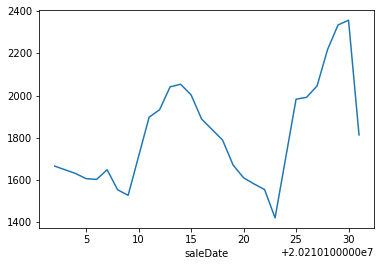

In [30]:
mandarin_by_date.apply(lambda x: x["totAmt"].sum()/x["totQty"].sum()).plot()